In [1]:
#  [코드 5.1] 필요한 모듈과 데이터를 가져오기 (Ch5. 백테스트.ipynb)

import python_quant
import pandas as pd

fs_path = r'C:\Users\JK\Desktop\주식 책쓰기\주식 책 데이터\재무제표데이터.xlsx'
fs_df = python_quant.get_finance_data(fs_path)
fr_path = r'C:\Users\JK\Desktop\주식 책쓰기\주식 책 데이터\재무비율데이터.xlsx'
fr_df = python_quant.get_finance_data(fr_path)
invest_path = r'C:\Users\JK\Desktop\주식 책쓰기\주식 책 데이터\투자지표데이터.xlsx'
invest_df = python_quant.get_finance_data(invest_path)
price_path = r'C:\Users\JK\Desktop\주식 책쓰기\주식 책 데이터\가격데이터.xlsx'
price_df = pd.read_excel(price_path)

In [15]:
#  [코드 5.2] 2015/12 기준으로 저PBR 종목 20개 가져오기 (Ch5. 백테스트.ipynb)

low_pbr_st = python_quant.get_value_rank(invest_df, 'PBR', '2015/12', 20)

In [16]:
#  [코드 5.3] 종목 코드만 가져오기 (Ch5. 백테스트.ipynb)

low_pbr_st.index

Index(['A073010', 'A007280', 'A101000', 'A003480', 'A003030', 'A019010',
       'A002220', 'A101680', 'A114920', 'A001230', 'A001530', 'A082740',
       'A016610', 'A011160', 'A005010', 'A008830', 'A003830', 'A071090',
       'A013580', 'A086790'],
      dtype='object')

In [17]:
#  [코드 5.4] 저pbr 주식들의 2016년 1월 이후의 가격 데이터 가져오기 (Ch5. 백테스트.ipynb)

code_list = []
for code in low_pbr_st.index:
    code_list.append(code.replace('A',''))
    
pbr_price = price_df[code_list]['2016-6':]

In [18]:
#  [코드 5.5] 각 종목마다 몇 개씩 살지 계산하여 포트폴리오 구성 (Ch5. 백테스트.ipynb)

pf_stock_num = {}
stock_amount = 0

for code in pbr_price.columns:
    temp = int( 5000000 / pbr_price[code][0] )
    pf_stock_num[code] = temp
    stock_amount = stock_amount + temp * pbr_price[code][0]
    
cash_amount = 100000000 - stock_amount

In [19]:
#  [코드 5.6] 주식 포트폴리오의 변화 구하기 (Ch5. 백테스트.ipynb)

stock_pf = 0
for code in pbr_price.columns:
    stock_pf = stock_pf + pbr_price[code] * pf_stock_num[code]

In [20]:
#  [코드 5.7] 주식 포트폴리오 데이터프레임으로 만들어주기 (Ch5. 백테스트.ipynb)

low_pbr_backtest = pd.DataFrame({'주식포트폴리오':stock_pf[:'2017-5']})

In [21]:
#  [코드 5.8] 현금 포트폴리오 데이터프레임에 추가하기 (Ch5. 백테스트.ipynb)

low_pbr_backtest['현금포트폴리오'] = [cash_amount] * len(low_pbr_backtest)

In [22]:
#  [코드 5.9] 종합 포트폴리오와 일 변화율 데이터프레임에 추가하기 (Ch5. 백테스트.ipynb)

low_pbr_backtest['종합포트폴리오'] =  low_pbr_backtest['주식포트폴리오'] + low_pbr_backtest['현금포트폴리오']
low_pbr_backtest['일변화율'] = low_pbr_backtest['종합포트폴리오'].pct_change()

In [23]:
#  [코드 5.10] 초기 투자금 대비 변화율 데이터프레임에 추가하기 (Ch5. 백테스트.ipynb)

low_pbr_backtest['총변화율'] = low_pbr_backtest['종합포트폴리오']/100000000 - 1

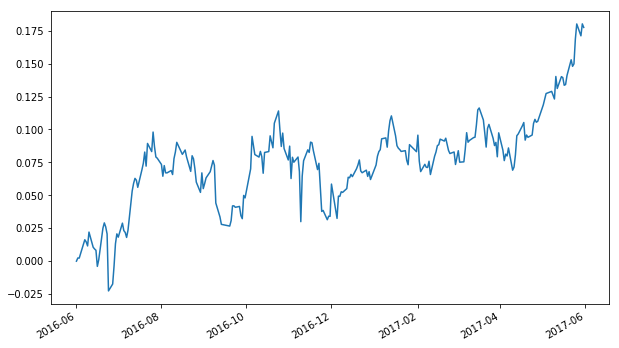

In [24]:
#  [코드 5.11] 초기 투자금 대비 변화율 그래프 그리기 (Ch5. 백테스트.ipynb)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
low_pbr_backtest['총변화율'].plot()
plt.show()

In [41]:
#  [코드 5.12] 백테스트 함수 버젼1 (Ch5. 백테스트.ipynb)


def backtest_beta(price_df, strategy_df, start_date, end_date, initial_money):

    code_list = []
    for code in strategy_df.index:
        code_list.append(code.replace('A',''))

    strategy_price = price_df[code_list][start_date:end_date]

    pf_stock_num = {}
    stock_amount = 0
    stock_pf = 0
    each_money = initial_money / len(strategy_df)
    for code in strategy_price.columns:
        temp = int( each_money / strategy_price[code][0] )
        pf_stock_num[code] = temp
        stock_amount = stock_amount + temp * strategy_price[code][0]
        stock_pf = stock_pf + strategy_price[code] * pf_stock_num[code]

    cash_amount = initial_money - stock_amount

    backtest_df = pd.DataFrame({'주식포트폴리오':stock_pf})
    backtest_df['현금포트폴리오'] = [cash_amount] * len(backtest_df)
    backtest_df['종합포트폴리오'] = backtest_df['주식포트폴리오'] + backtest_df['현금포트폴리오']
    backtest_df['일변화율'] = backtest_df['종합포트폴리오'].pct_change()
    backtest_df['총변화율'] = backtest_df['종합포트폴리오']/initial_money - 1
    
    return backtest_df

In [42]:
#  [코드 5.13] 저per 백테스트 (Ch5. 백테스트.ipynb)

strategy_date = '2015/12'
start_date = '2016-6'
end_date = '2017-5'
initial_money = 100000000

low_per = python_quant.get_value_rank(invest_df, 'PER', strategy_date, 20)
per_backtest = backtest_beta(price_df, low_per, start_date, end_date, initial_money)

ValueError: cannot convert float NaN to integer

In [43]:
#  [코드 5.14] 특정 날짜에 가격 데이터프레임에 데이터가 존재하는 종목들 리스트 가져오기 (Ch5. 백테스트.ipynb)

price_df[start_date].iloc[0].dropna().index

Index(['060310', '095570', '068400', '006840', '054620', '211270', '027410',
       '138930', '001460', '001040',
       ...
       '005010', '084110', '145020', '069260', '024060', '010240', '189980',
       '000540', '003280', '037440'],
      dtype='object', length=1931)

In [44]:
#  [코드 5.15] 종목 코드 앞에 'A'붙이기 (Ch5. 백테스트.ipynb)

new_code_list = []
for code in price_df[start_date].iloc[0].dropna().index:
    new_code_list.append('A' + code)

In [45]:
#  [코드 5.16] 해당 날짜에 가격이 없으면 투자 관련 데이터에서 해당 종목 없애는 함수 (Ch5. 백테스트.ipynb)

def select_code_by_price(price_df, data_df, start_date):
    new_code_list = []
    for code in price_df[start_date].iloc[0].dropna().index:
        new_code_list.append('A' + code)
        
    selected_df =  data_df.loc[new_code_list]
    return selected_df

In [46]:
#  [코드 5.17] 저per 포트폴리오 백테스트 (Ch5. 백테스트.ipynb)

strategy_date = '2015/12'
start_date = '2016-6'
end_date = '2017-5'
initial_money = 100000000

low_per = python_quant.get_value_rank(select_code_by_price(price_df, invest_df, start_date), 'PER', strategy_date, 20)
per_backtest = backtest_beta(price_df, low_per, start_date, end_date, initial_money)

c:\users\jk\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


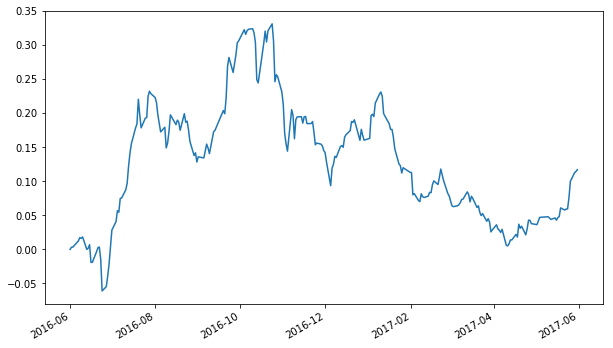

In [47]:
#  [코드 5.18] 저per 백테스트 결과 그래프 그리기 (Ch5. 백테스트.ipynb)

plt.figure(figsize=(10, 6))
per_backtest['총변화율'].plot()
plt.show()

c:\users\jk\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


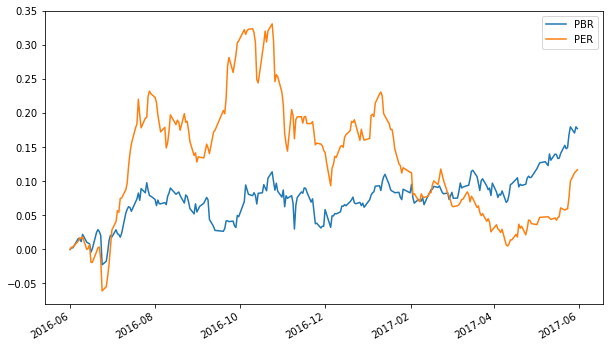

In [62]:
#  [코드 5.19] 저pbr, 저per 전략 비교하기 (Ch5. 백테스트.ipynb)

strategy_date = '2015/12'
start_date = '2016-6'
end_date = '2017-5'
initial_money = 100000000

low_pbr = python_quant.get_value_rank(select_code_by_price(price_df, invest_df, start_date), 'PBR', strategy_date, 20)
low_per = python_quant.get_value_rank(select_code_by_price(price_df, invest_df, start_date), 'PER', strategy_date, 20)

pbr_backtest = backtest_beta(price_df, low_pbr, start_date, end_date, initial_money)
per_backtest = backtest_beta(price_df, low_per, start_date, end_date, initial_money)

plt.figure(figsize=(10, 6))
pbr_backtest['총변화율'].plot(label='PBR')
per_backtest['총변화율'].plot(label='PER')
plt.legend()
plt.show()

c:\users\jk\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


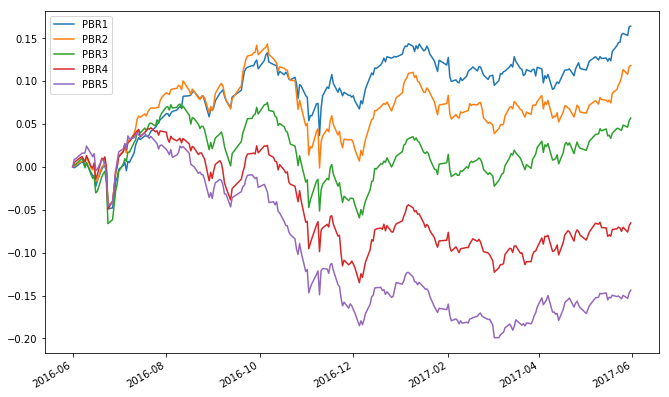

In [48]:
#  [코드 5.20] pbr 구간별 수익률 비교 (Ch5. 백테스트.ipynb)

strategy_date = '2015/12'
start_date = '2016-6'
end_date = '2017-5'
initial_money = 100000000

all_pbr = python_quant.get_value_rank(select_code_by_price(price_df, invest_df, start_date), 'PBR', strategy_date, None).dropna()

length = int(len(all_pbr)/5)

pbr_backtest1 = backtest_beta(price_df, all_pbr[:length], start_date, end_date, initial_money)
pbr_backtest2 = backtest_beta(price_df, all_pbr[length:length*2], start_date, end_date, initial_money)
pbr_backtest3 = backtest_beta(price_df, all_pbr[length*2:length*3], start_date, end_date, initial_money)
pbr_backtest4 = backtest_beta(price_df, all_pbr[length*3:length*4], start_date, end_date, initial_money)
pbr_backtest5 = backtest_beta(price_df, all_pbr[length*4:], start_date, end_date, initial_money)

plt.figure(figsize=(11, 7))
pbr_backtest1['총변화율'].plot(label='PBR1')
pbr_backtest2['총변화율'].plot(label='PBR2')
pbr_backtest3['총변화율'].plot(label='PBR3')
pbr_backtest4['총변화율'].plot(label='PBR4')
pbr_backtest5['총변화율'].plot(label='PBR5')
plt.legend()
plt.show()

c:\users\jk\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


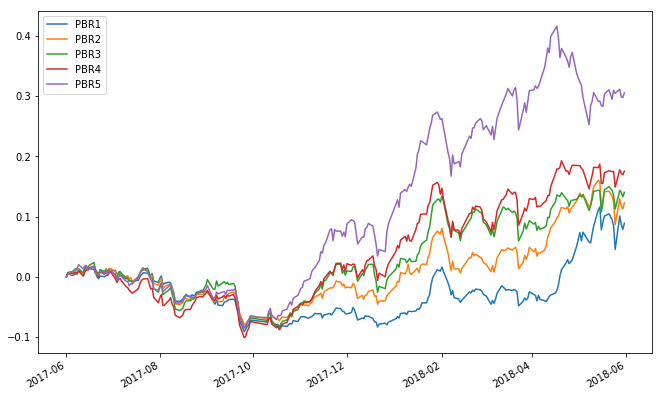

In [49]:
#  [코드 5.21] 연도를 바꾼 뒤 pbr 구간별 수익률 비교 (Ch5. 백테스트.ipynb)

strategy_date = '2016/12'
start_date = '2017-6'
end_date = '2018-5'
initial_money = 100000000

all_pbr = python_quant.get_value_rank(select_code_by_price(price_df, invest_df, start_date), 'PBR', strategy_date, None).dropna()

length = int(len(all_pbr)/5)

pbr_backtest1 = backtest_beta(price_df, all_pbr[:length], start_date, end_date, initial_money)
pbr_backtest2 = backtest_beta(price_df, all_pbr[length:length*2], start_date, end_date, initial_money)
pbr_backtest3 = backtest_beta(price_df, all_pbr[length*2:length*3], start_date, end_date, initial_money)
pbr_backtest4 = backtest_beta(price_df, all_pbr[length*3:length*4], start_date, end_date, initial_money)
pbr_backtest5 = backtest_beta(price_df, all_pbr[length*4:], start_date, end_date, initial_money)

plt.figure(figsize=(11, 7))
pbr_backtest1['총변화율'].plot(label='PBR1')
pbr_backtest2['총변화율'].plot(label='PBR2')
pbr_backtest3['총변화율'].plot(label='PBR3')
pbr_backtest4['총변화율'].plot(label='PBR4')
pbr_backtest5['총변화율'].plot(label='PBR5')
plt.legend()
plt.show()

c:\users\jk\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
c:\users\jk\anaconda3\python_quant.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fscore_df['당기순이익점수'] = fscore_df['당기순이익'] > 0
c:\users\jk\anaconda3\python_quant.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ver

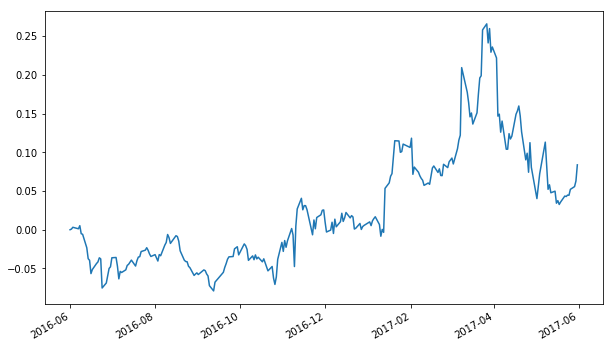

In [95]:
# [코드 5.22] fscroe 백테스트 (Ch5. 백테스트.ipynb)

strategy_date = '2015/12'
start_date = '2016-6'
end_date = '2017-5'
initial_money = 100000000

f_score_result = python_quant.get_fscore(select_code_by_price(price_df, fs_df, start_date), strategy_date, 20)
f_score_backtest = backtest_beta(price_df, f_score_result, start_date, end_date, initial_money)

plt.figure(figsize=(10, 6))
f_score_backtest['총변화율'].plot()
plt.show()

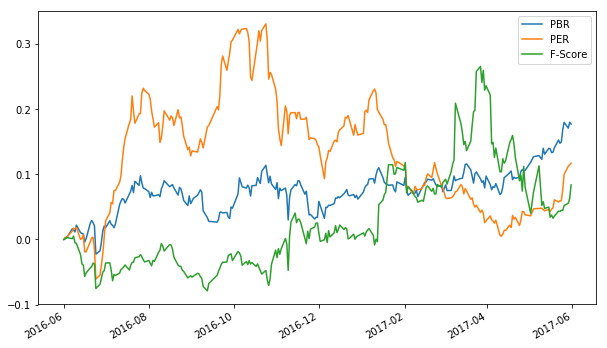

In [68]:
# [코드 5.23] fscroe, 저PER, 저PBR 전략 비교 그래프 그리기 (Ch5. 백테스트.ipynb)

plt.figure(figsize=(10, 6))
pbr_backtest['총변화율'].plot(label='PBR')
per_backtest['총변화율'].plot(label='PER')
f_score_backtest['총변화율'].plot(label='F-Score')
plt.legend()
plt.show()

In [185]:
# [코드 5.24] 백테스트 시작날짜가 주어지면 전략 기준 날짜를 계산하는 함수 (Ch5. 백테스트.ipynb)

def get_strategy_date(start_date):
    temp_year = int(start_date.split('-')[0])
    temp_month = start_date.split('-')[1]
    if temp_month in '1 2 3 4 5'.split(' '):
        strategy_date = str(temp_year - 2) + '/12'
    else:
        strategy_date = str(temp_year - 1) + '/12'
    return strategy_date

In [113]:
# [코드 5.25] 백테스트 기간이 주어지면 리밸런싱 주기로 나누기 (Ch5. 백테스트.ipynb)

start_date = '2015-6'
end_date = '2018-5'

start_year = int(start_date.split('-')[0])
end_year = int(end_date.split('-')[0])

for temp in range(start_year, end_year):
    print(str(temp) + '-6', str(temp+1) + '-6')

2015-6 2016-6
2016-6 2017-6
2017-6 2018-6


In [186]:
# [코드 5.26] 2기간 동안 리밸런싱 한 번 하면서 백테스트 하기 (Ch5. 백테스트.ipynb)

start_date1 = '2016-6'
end_date1 = '2017-5'
strategy_date1 = get_strategy_date(start_date1)
initial_money1 = 100000000

low_per1 = python_quant.get_value_rank(select_code_by_price(price_df, invest_df, start_date1), 'PER', strategy_date1, 20)
per_backtest1 = backtest_beta(price_df, low_per1, start_date1, end_date1, initial_money1)

start_date2 = '2017-6'
end_date2 = '2018-5'
strategy_date2 = get_strategy_date(start_date2)
initial_money2 = 100000000

low_per2 = python_quant.get_value_rank(select_code_by_price(price_df, invest_df, start_date2), 'PER', strategy_date2, 20)
per_backtest2 = backtest_beta(price_df, low_per2, start_date2, end_date2, initial_money2)

c:\users\jk\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


In [187]:
# [코드 5.27] 2기간 동안 리밸런싱 한 번 하면서 백테스트 하기 개선 (Ch5. 백테스트.ipynb)

start_date1 = '2016-6'
end_date1 = '2017-6'
strategy_date1 = get_strategy_date(start_date1)
initial_money1 = 100000000

low_per1 = python_quant.get_value_rank(select_code_by_price(price_df, invest_df, start_date1), 'PER', strategy_date1, 20)
per_backtest1 = backtest_beta(price_df, low_per1, start_date1, end_date1, initial_money1)
temp_end1 = per_backtest1[end_date1].index[0]
per_backtest1 = per_backtest1[:temp_end1]

start_date2 = '2017-6'
end_date2 = '2018-6'
strategy_date2 = get_strategy_date(start_date2)
initial_money2 = per_backtest1['종합포트폴리오'][-1]

low_per2 = python_quant.get_value_rank(select_code_by_price(price_df, invest_df, start_date2), 'PER', strategy_date2, 20)
per_backtest2 = backtest_beta(price_df, low_per2, start_date2, end_date2, initial_money2)
temp_end2 = per_backtest2[end_date2 ].index[0]
per_backtest2 = per_backtest2[:temp_end2]

c:\users\jk\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


In [188]:
# [코드 5.28] 두 번의 백테스트 기간 동안 생성된 2개의 데이터프레임을 붙이기 (Ch5. 백테스트.ipynb)

total_backtest = pd.concat([per_backtest1[:-1], per_backtest2])

In [189]:
# [코드 5.29] 이어 붙인 데이터프레임에서 변화율들을 다시 계산하여 저장 (Ch5. 백테스트.ipynb)

total_backtest['일변화율'] = total_backtest['종합포트폴리오'].pct_change()
total_backtest['총변화율'] = total_backtest['종합포트폴리오']/ total_backtest['종합포트폴리오'][0] - 1

In [190]:
# [코드 5.30] 리밸런싱 코드 for문으로 정리 (Ch5. 백테스트.ipynb)

start_date = '2016-6'
end_date = '2018-5'
initial_money = 100000000

start_year = int(start_date.split('-')[0])
end_year = int(end_date.split('-')[0])

total_df = 0
for temp in range(start_year, end_year):
    this_term_start = str(temp) + '-6'
    this_term_end = str(temp+1) + '-6'
    strategy_date = get_strategy_date(this_term_start)
    low_per = python_quant.get_value_rank(select_code_by_price(price_df, invest_df, this_term_start), 'PER', strategy_date, 20)
    per_backtest = backtest_beta(price_df, low_per, this_term_start, this_term_end, initial_money)
    temp_end = per_backtest[this_term_end].index[0]
    per_backtest = per_backtest[:temp_end]
    initial_money =  per_backtest['종합포트폴리오'][-1]
    if temp == start_year:
        total_df = per_backtest
    else:
        total_df = pd.concat([total_df[:-1], per_backtest])
        
total_df ['일변화율'] = total_df ['종합포트폴리오'].pct_change()
total_df ['총변화율'] = total_df ['종합포트폴리오']/ total_df ['종합포트폴리오'][0] - 1

c:\users\jk\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


c:\users\jk\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


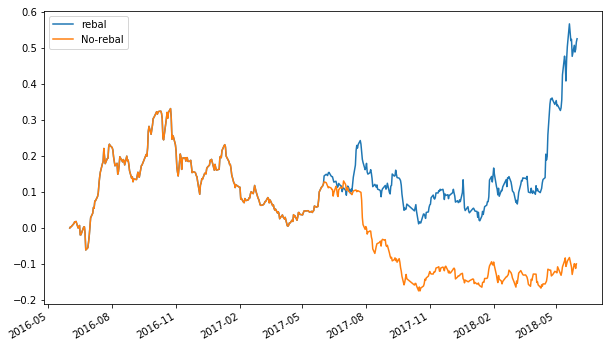

In [194]:
# [코드 5.31] 저PER 전략 리밸러싱 있는 경우와 없는 경우 비교 (Ch5. 백테스트.ipynb)

start_date = '2016-6'
end_date = '2018-5'
initial_money = 100000000

start_year = int(start_date.split('-')[0])
end_year = int(end_date.split('-')[0])

total_df = 0
for temp in range(start_year, end_year):
    this_term_start = str(temp) + '-6'
    this_term_end = str(temp+1) + '-6'
    strategy_date = get_stratrge_date(this_term_start)
    low_per = python_quant.get_value_rank(select_code_by_price(price_df, invest_df, this_term_start), 'PER', strategy_date, 20)
    per_backtest = backtest_beta(price_df, low_per, this_term_start, this_term_end, initial_money)
    temp_end = per_backtest[this_term_end].index[0]
    per_backtest = per_backtest[:temp_end]
    initial_money =  per_backtest['종합포트폴리오'][-1]
    if temp == start_year:
        total_df = per_backtest
    else:
        total_df = pd.concat([total_df[:-1], per_backtest])
        
total_df ['일변화율'] = total_df ['종합포트폴리오'].pct_change()
total_df ['총변화율'] = total_df ['종합포트폴리오']/ total_df ['종합포트폴리오'][0] - 1

low_per = python_quant.get_value_rank(select_code_by_price(price_df, invest_df, start_date), 'PER', get_strategy_date(start_date), 20)
per_backtest = backtest_beta(price_df, low_per, start_date, end_date, initial_money)

plt.figure(figsize=(10, 6))
total_backtest['총변화율'].plot(label='rebal')
per_backtest['총변화율'].plot(label='No-rebal')
plt.legend()
plt.show()

In [225]:
# [코드 5.32] 리밸런싱 백테스트 함수화 (Ch5. 백테스트.ipynb)

def backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, num, value_type=None, value_list=None, date_range=None):
    
    start_year = int(start_date.split('-')[0])
    end_year = int(end_date.split('-')[0])

    total_df = 0
    for temp in range(start_year, end_year):
        this_term_start = str(temp) + '-' + start_date.split('-')[1]
        this_term_end = str(temp+1) + '-' + start_date.split('-')[1]
        strategy_date = get_strategy_date(this_term_start)
        
        if strategy.__name__ == 'high_roa':
            st_df = strategy(select_code_by_price(price_df, fr_df, this_term_start), strategy_date, num)
        elif strategy.__name__ == 'magic_formula':
            st_df = strategy(select_code_by_price(price_df, invest_df, this_term_start), strategy_date, num)
        elif strategy.__name__ == 'get_value_rank':
            st_df = strategy(select_code_by_price(price_df, invest_df, this_term_start), value_type, strategy_date, num)
        elif strategy.__name__ == 'make_value_combo':
            st_df = strategy(value_list, select_code_by_price(price_df, invest_df, this_term_start), strategy_date, num)
        elif strategy.__name__ == 'get_fscore':
            st_df = strategy(select_code_by_price(price_df, fs_df, this_term_start), strategy_date, num)
        elif strategy.__name__ == 'get_momentum_rank':
            st_df = strategy(price_df, price_df[this_term_start].index[0] , date_range, num)
        elif strategy.__name__ == 'get_value_quality':
            st_df = strategy(select_code_by_price(price_df, invest_df, this_term_start), 
                             select_code_by_price(price_df, fs_df, this_term_start), strategy_date, num)
        
        backtest = backtest_beta(price_df, st_df, this_term_start, this_term_end, initial_money)
        temp_end = backtest[this_term_end].index[0]
        backtest = backtest[:temp_end]
        initial_money =  backtest['종합포트폴리오'][-1]
        if temp == start_year:
            total_df = backtest
        else:
            total_df = pd.concat([total_df[:-1], backtest])

    total_df ['일변화율'] = total_df ['종합포트폴리오'].pct_change()
    total_df ['총변화율'] = total_df ['종합포트폴리오']/ total_df ['종합포트폴리오'][0] - 1
    
    return total_df

c:\users\jk\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


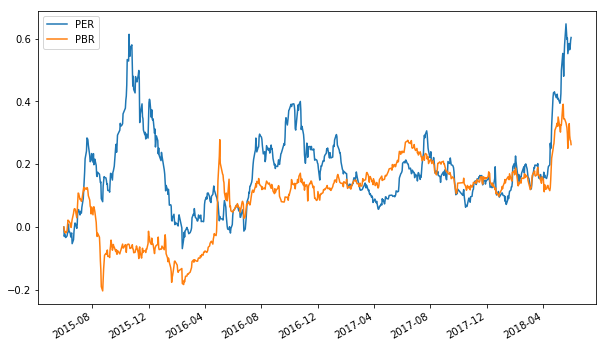

In [226]:
# [코드 5.33] 저PER과 저PBR 비교 (Ch5. 백테스트.ipynb)

start_date = '2015-6'
end_date = '2018-5'
initial_money = 100000000
strategy = python_quant.get_value_rank

back_test_result1 = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PER')
back_test_result2 = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PBR')

plt.figure(figsize=(10, 6))
back_test_result1['총변화율'].plot(label='PER')
back_test_result2['총변화율'].plot(label='PBR')
plt.legend()
plt.show()

c:\users\jk\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


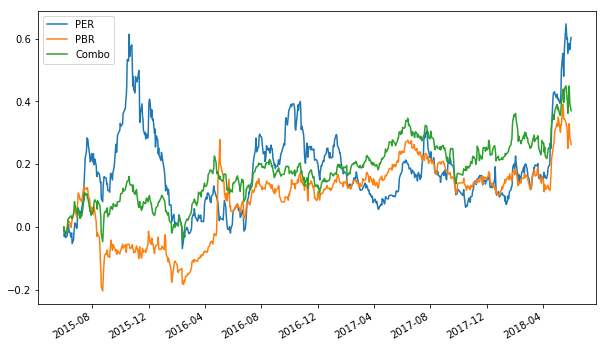

In [227]:
# [코드 5.34] 저PER과 저PBR, 혼합 전략 비교 (Ch5. 백테스트.ipynb)

start_date = '2015-6'
end_date = '2018-5'
initial_money = 100000000
strategy = python_quant.get_value_rank
strategy2 = python_quant.make_value_combo

back_test_result1 = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PER')
back_test_result2 = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PBR')
back_test_result3 = backtest_re(strategy2, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_list=['PER','PBR'])

plt.figure(figsize=(10, 6))
back_test_result1['총변화율'].plot(label='PER')
back_test_result2['총변화율'].plot(label='PBR')
back_test_result3['총변화율'].plot(label='Combo')
plt.legend()
plt.show()

c:\users\jk\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
c:\users\jk\anaconda3\python_quant.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fscore_df['당기순이익점수'] = fscore_df['당기순이익'] > 0
c:\users\jk\anaconda3\python_quant.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ver

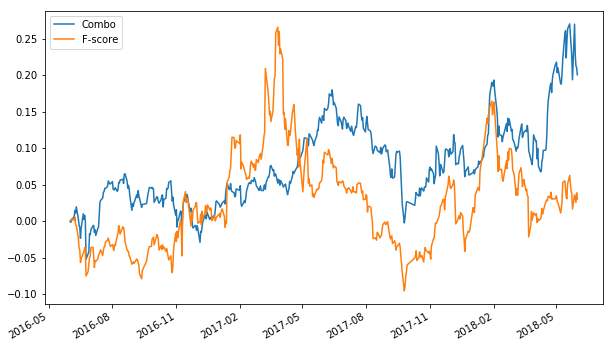

In [229]:
# [코드 5.35] F-score와 혼합 전략 비교 (Ch5. 백테스트.ipynb)

start_date = '2016-6'
end_date = '2018-6'
initial_money = 100000000
strategy1 = python_quant.make_value_combo
strategy2 = python_quant.get_fscore

back_test_result1 = backtest_re(strategy1, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_list=['PER','PBR'])
back_test_result2 = backtest_re(strategy2, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20)

plt.figure(figsize=(10, 6))
back_test_result1['총변화율'].plot(label='Combo')
back_test_result2['총변화율'].plot(label='F-score')
plt.legend()
plt.show()

c:\users\jk\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
c:\users\jk\anaconda3\python_quant.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fscore_df['당기순이익점수'] = fscore_df['당기순이익'] > 0
c:\users\jk\anaconda3\python_quant.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ver

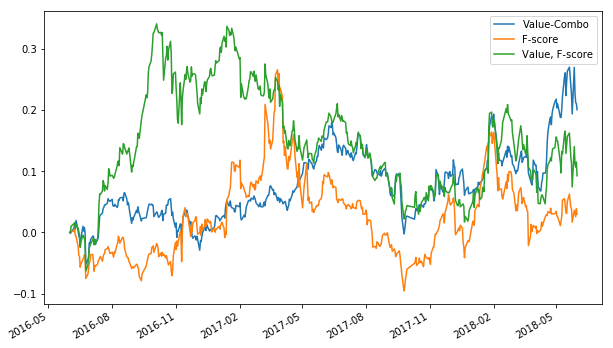

In [230]:
# [코드 5.36] F-score, PBR+PER, F-score+PBR+PER 전략 비교 (Ch5. 백테스트.ipynb)

start_date = '2016-6'
end_date = '2018-6'
initial_money = 100000000
strategy1 = python_quant.make_value_combo
strategy2 = python_quant.get_fscore
strategy3 = python_quant.get_value_quality

back_test_result1 = backtest_re(strategy1, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_list=['PER','PBR'])
back_test_result2 = backtest_re(strategy2, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20)
back_test_result3 = backtest_re(strategy3, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20)

plt.figure(figsize=(10, 6))
back_test_result1['총변화율'].plot(label='PER+PBR')
back_test_result2['총변화율'].plot(label='F-score')
back_test_result3['총변화율'].plot(label='Value + F-score')
plt.legend()
plt.show()

In [293]:
# [코드 5.37] CAGR 계산 (Ch5. 백테스트.ipynb)

start_date = '2015-6'
end_date = '2018-5'
initial_money = 100000000
strategy = python_quant.get_value_rank
back_test_result = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PER')

num_of_year = int(end_date.split('-')[0]) - int(start_date.split('-')[0])
CAGR = (back_test_result.iloc[-1]['종합포트폴리오'] / back_test_result.iloc[0]['종합포트폴리오']) ** (1/num_of_year) - 1

c:\users\jk\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


In [294]:
# [코드 5.38] MDD 계산 (Ch5. 백테스트.ipynb)

max_list = [0]
mdd_list = [0]

for i in back_test_result.index[1:]:
    max_list.append(back_test_result['총변화율'][:i].max())
    if max_list[-1] > max_list[-2]:
        mdd_list.append(0)
    else:
        mdd_list.append(min(back_test_result['총변화율'][i] - max_list[-1], mdd_list[-1])   )
        
back_test_result['max'] = max_list
back_test_result['MDD'] = mdd_list

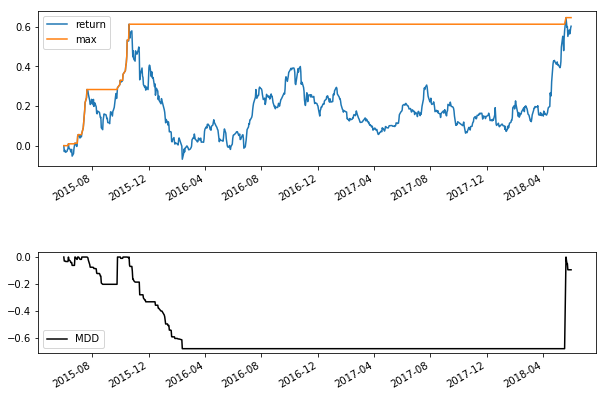

In [331]:
# [코드 5.39] MDD 그래프 그리기 (Ch5. 백테스트.ipynb)

plt.figure(figsize=(10, 7))
plt.subplot(2,1,1)
back_test_result['총변화율'].plot(label='return')
back_test_result['max'].plot(label='max')
plt.legend()

plt.subplot(3,1,3)
back_test_result['MDD'].plot(label='MDD', c='black')
plt.legend()

In [324]:
# [코드 5.40] MDD 함수화 (Ch5. 백테스트.ipynb)

def get_mdd(back_test_df):
    max_list = [0]
    mdd_list = [0]

    for i in back_test_df.index[1:]:
        max_list.append(back_test_df['총변화율'][:i].max())
        if max_list[-1] > max_list[-2]:
            mdd_list.append(0)
        else:
            mdd_list.append(min(back_test_df['총변화율'][i] - max_list[-1], mdd_list[-1])   )

    back_test_df['max'] = max_list
    back_test_df['MDD'] = mdd_list
    
    return back_test_df

c:\users\jk\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


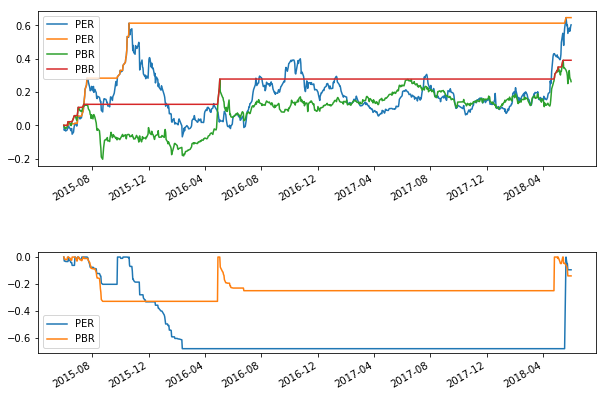

In [332]:
# [코드 5.41] MDD 비교하기 (Ch5. 백테스트.ipynb)

start_date = '2015-6'
end_date = '2018-5'
initial_money = 100000000
strategy = python_quant.get_value_rank

back_test_result1 = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PER')
back_test_result2 = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PBR')

back_test_result1 = get_mdd(back_test_result1)
back_test_result2 = get_mdd(back_test_result2)


plt.figure(figsize=(10, 7))
plt.subplot(2,1,1)
back_test_result1['총변화율'].plot(label='PER')
back_test_result1['max'].plot(label='PER')
back_test_result2['총변화율'].plot(label='PBR')
back_test_result2['max'].plot(label='PBR')
plt.legend()

plt.subplot(3,1,3)
back_test_result1['MDD'].plot(label='PER')
back_test_result2['MDD'].plot(label='PBR')
plt.legend()